In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [11]:
dftrain = pd.read_csv('train.csv')
dftest = pd.read_csv('test.csv')

In [12]:
Xtrain = dftrain.loc[:,'MSSubClass':'SaleCondition']
Xtrain.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [13]:
Ytrain = pd.DataFrame(dftrain['SalePrice'])
Ytrain.head()

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000


In [14]:
Xtest = dftest.loc[:,'MSSubClass':'SaleCondition']

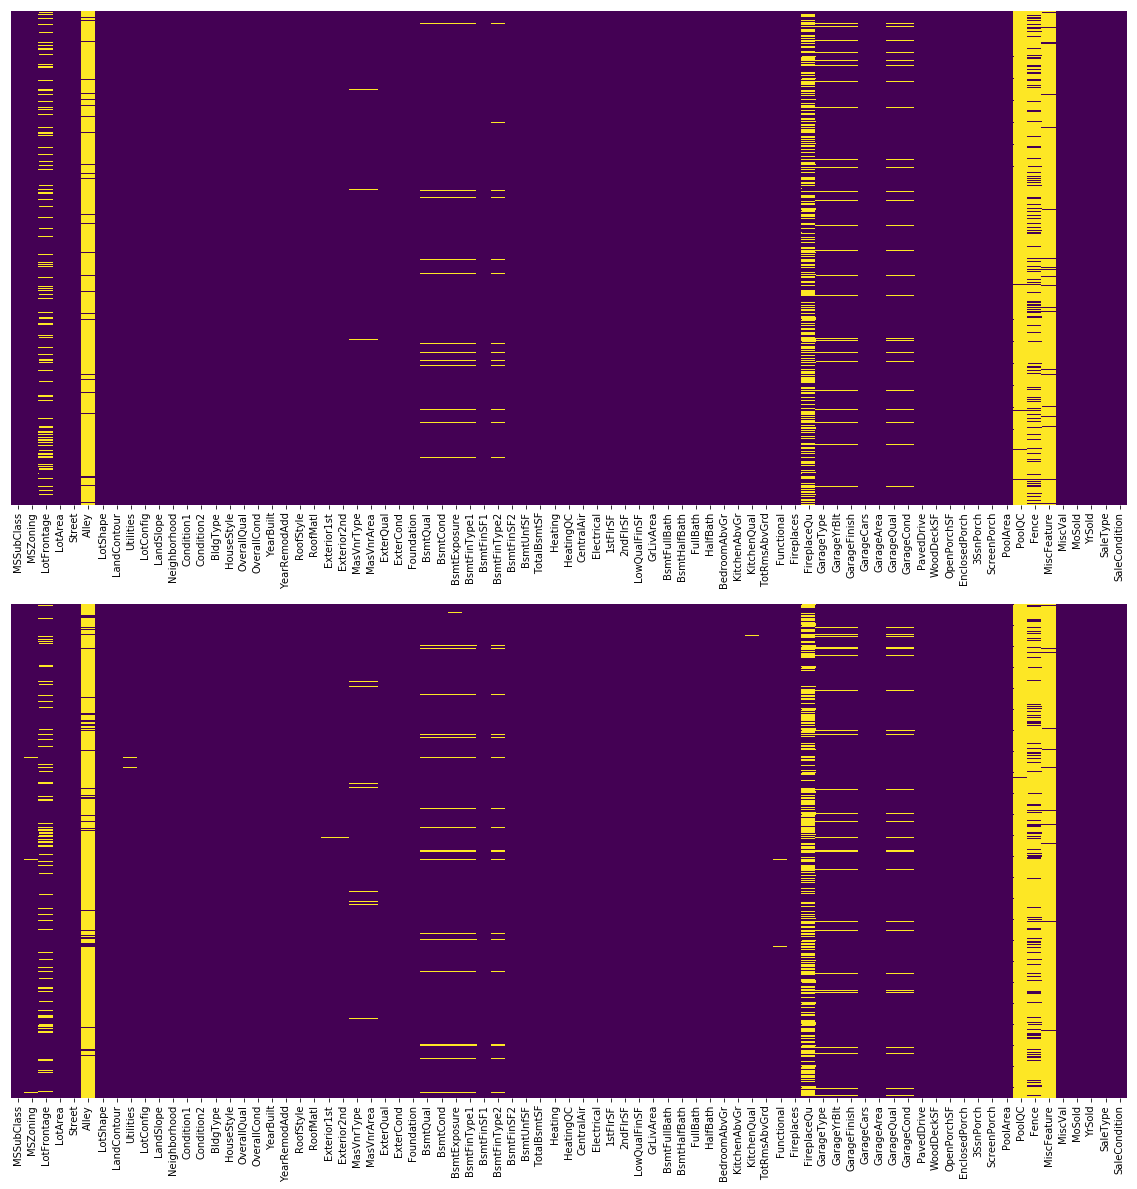

In [15]:
plt.figure(figsize=(20,20))
plt.subplot(2,1,1)
sns.heatmap(Xtrain.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.subplot(2,1,2)
sns.heatmap(Xtest.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [16]:
Xtrain.drop(['Alley','PoolQC','Fence','MiscFeature','FireplaceQu'],axis=1,inplace=True)
Xtest.drop(['Alley','PoolQC','Fence','MiscFeature','FireplaceQu'],axis=1,inplace=True)

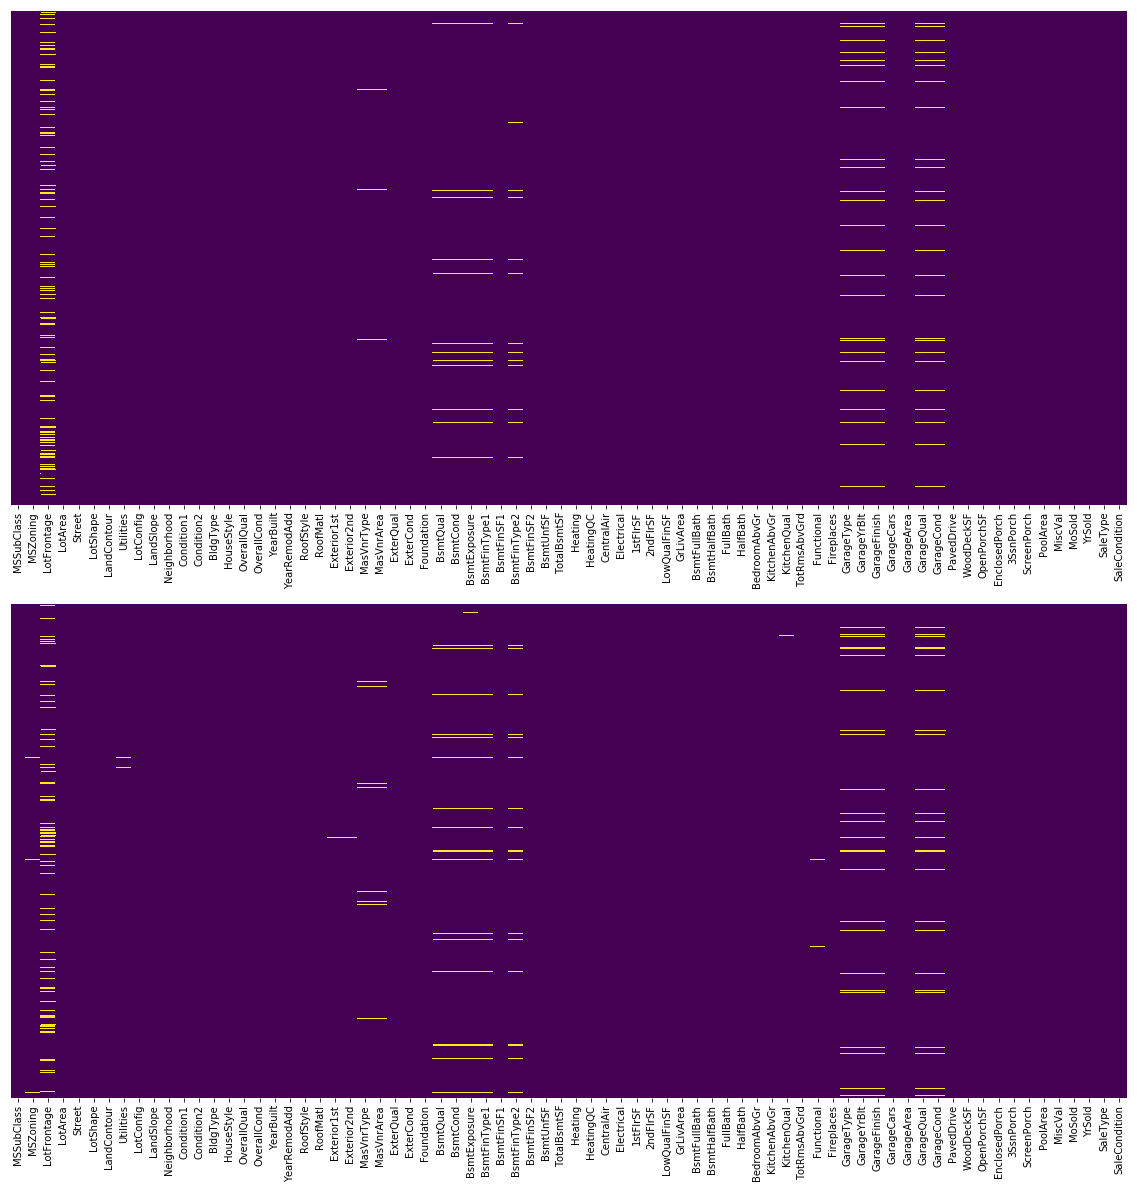

In [17]:
plt.figure(figsize=(20,20))
plt.subplot(2,1,1)
sns.heatmap(Xtrain.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.subplot(2,1,2)
sns.heatmap(Xtest.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [20]:
Xtrain = Xtrain.fillna(Xtrain.mean())
Xtest = Xtest.fillna(Xtrain.mean())
# Xtrain.mean()

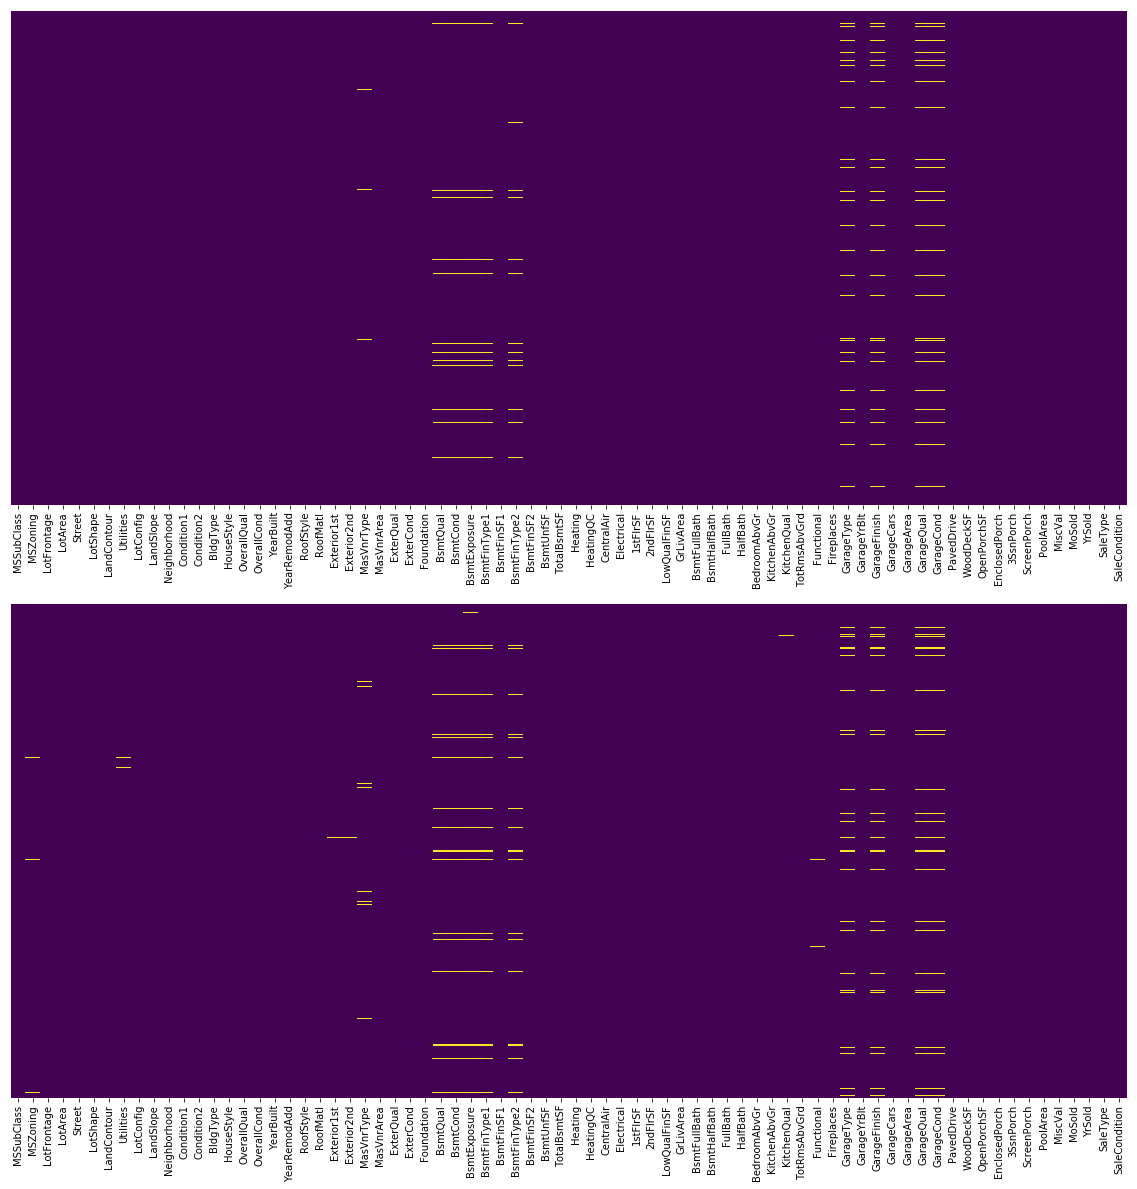

In [21]:
plt.figure(figsize=(20,20))
plt.subplot(2,1,1)
sns.heatmap(Xtrain.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.subplot(2,1,2)
sns.heatmap(Xtest.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [28]:
tmpD = dftest.isnull().sum(axis=0)
cols = list(tmpD[tmpD>0].index)
dic = {}

for var in cols:
    if type(dftest[var][0]) is str:
        dic[var] = (dftest[var].value_counts().index[0],dftest[var].value_counts().max())
#         dftest.loc[:,var] = dic[var][0]
#     else:
#         dftest.loc[:,var]=dftrain[var].mean()
            

In [30]:
cols

['MSZoning',
 'LotFrontage',
 'Alley',
 'Utilities',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType']